In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

In [20]:
# Import the dataset from Clustering Adapter
data = pd.read_csv("../Clustering Adapter/Adapter Output/result_w_vector.csv")
v_map = pd.read_csv("../Clustering Adapter/Adapter Output/vector_mapping.csv")
print(v_map.head())

data.head()
# data.info()

   Unnamed: 0  Size      Itemset
0           0     1  salty snack
1           1     1   whole milk
2           2     1       pastry
3           3     1       yogurt
4           4     1      sausage


,Unnamed: 0,Transaction,Vector
0,0,"['salty snack', 'pastry', 'whole milk']","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"['yogurt', 'semi-finished bread', 'whole milk'...","[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"['soda', 'pickled vegetables']","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,"['misc. beverages', 'canned beer']","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"['hygiene articles', 'sausage']","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [35]:
# Clustering Transaction based on Vector in data
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import ast
import numpy as np
# Convert string to list
import ast

data = pd.read_csv("../Clustering Adapter/Adapter Output/result_w_vector.csv")
v_map = pd.read_csv("../Clustering Adapter/Adapter Output/vector_mapping.csv")

# Load your data
df = data

# Convert string representation of list to actual list
df['Vector'] = df['Vector'].apply(lambda x: ast.literal_eval(x))

# Convert list of vectors into DataFrame
vector_df = pd.DataFrame(df['Vector'].to_list())

# Extract Vector column
X = vector_df.values

# Initialize AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Fit the model and assign clusters
df['Cluster'] = agg_clustering.fit_predict(X)

In [37]:
# Show cluster membership in a table
print(df.head())

# Draw a scatter plot of your data assigned to each cluster
import matplotlib.pyplot as plt
import seaborn as sns




   Unnamed: 0                                        Transaction  \
0           0            ['salty snack', 'pastry', 'whole milk']   
1           1  ['yogurt', 'semi-finished bread', 'whole milk'...   
2           2                     ['soda', 'pickled vegetables']   
3           3                 ['misc. beverages', 'canned beer']   
4           4                    ['hygiene articles', 'sausage']   

                                              Vector  Cluster  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        2  
1  [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        7  
2  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        1  
3  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...        2  
4  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...        2  


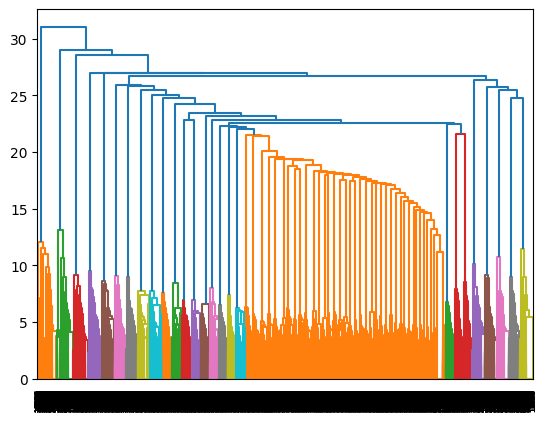

In [27]:
# Create Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, 'ward')

# Create a dendrogram
dendrogram(Z)

# Show the plot
plt.show()

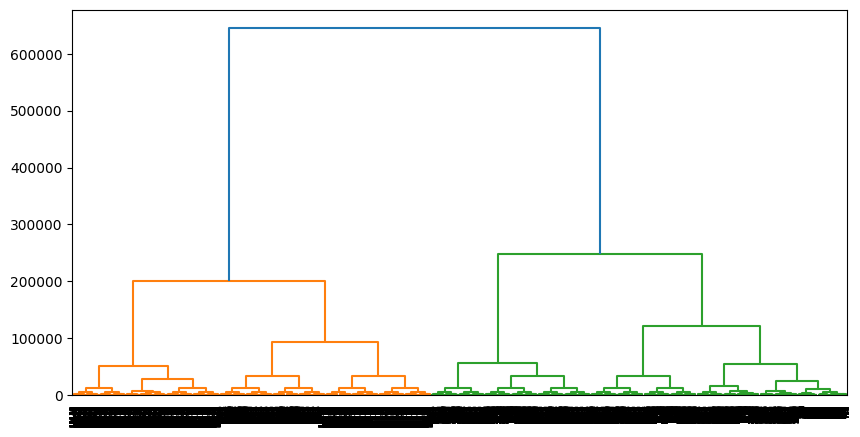

In [5]:
# Testing the model
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Select only the numeric columns from the data dataframe
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data_numeric = data[numeric_cols]

# Calculate the linkage matrix using the Ward method
Z = linkage(data_numeric, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()
